In [23]:
import pysm
from pysm.nominal import models

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

Map parameters                                                                                                                                             

In [24]:
nside = 512 #int(len(ells)/3)
lmax = 3*nside-1
ells = np.arange(lmax+1)

## Power law model 

#### Parameters
Gamma (convergence)

In [25]:
gamma_beta_sync = -2.5 
gamma_beta_dust = -3.5 

#### Calculate power spectrum (input)

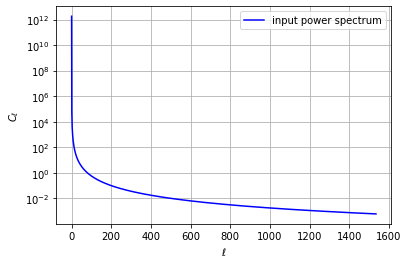

In [26]:
def powerlaw(ells, gamma):
    c_ells = ((ells+0.001) / 80.)**gamma
    return c_ells

cl_betaSync = powerlaw(ells, gamma_beta_sync)
cl_betaDust = powerlaw(ells, gamma_beta_dust)

plt.figure()
plt.semilogy(ells, cl_betaSync, 'b',label="input power spectrum")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$') #'$\ell(\ell+1) C_\ell/2\pi$'<br>
plt.legend()
plt.grid()
plt.show()

#### Map from power spectrum

In [39]:
def map_beta(ells, gamma):
    cl_beta = powerlaw(ells, gamma)
    delta_map = hp.synfast(cl_beta, nside, new=True, verbose=False)
    sigma_map = np.sqrt(np.mean(delta_map**2))
    sigma_des = 0.1 #desired typical map variation
    delta_beta = delta_map * sigma_des / sigma_map
    return delta_beta + np.mean(delta_beta)

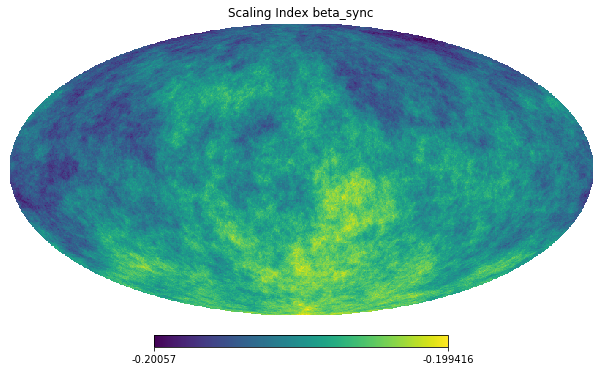

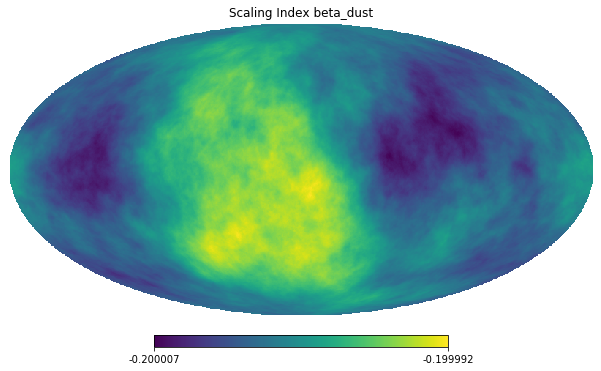

In [40]:
map_beta_sync = map_beta(ells, gamma_beta_sync)
map_beta_dust = map_beta(ells, gamma_beta_dust)

hp.mollview(map_beta_sync, title='Scaling Index beta_sync') #unit='$\\beta$'
hp.mollview(map_beta_dust, title='Scaling Index beta_dust') #unit='$\\beta$'

plt.show()

In [41]:
map_beta_sync_fin = hp.synfast(cl_betaSync, nside, new=True, verbose=False) - map_beta_sync
map_beta_dust_fin = hp.synfast(cl_betaDust, nside, new=True, verbose=False) - map_beta_dust

#### Power spectrum from map (output)

In [42]:
cl_betaSync_out = hp.anafast(map_beta_sync_fin, lmax=lmax)

cl_betaDust_out = hp.anafast(map_beta_dust_fin, lmax=lmax)

#### Compare input and output power spectra

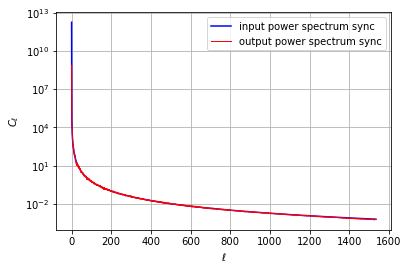

In [43]:
plt.figure()
plt.semilogy(ells, cl_betaSync, 'b',label="input power spectrum sync")
plt.semilogy(ells, cl_betaSync_out, 'r', linewidth=1, label="output power spectrum sync")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.legend()
plt.grid()
plt.show()

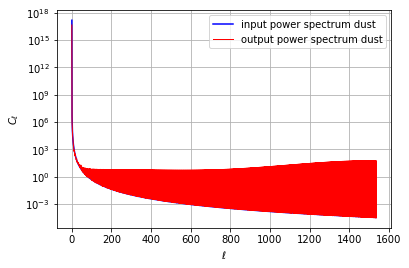

In [44]:
plt.figure()
plt.semilogy(ells, cl_betaDust, 'b',label="input power spectrum dust")
plt.semilogy(ells, cl_betaDust_out, 'r', linewidth=1, label="output power spectrum dust")
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.legend()
plt.grid()
plt.show()